## Corona-Imfpungen in Deutschland: Verlauf und Prognose

Neueste Daten laden unter: https://impfdashboard.de/

Detaillierte Datenquellen (Impfungen kumulativ nach Bundesländern und Indikation, werktäglich aktualisiert): https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Impfquotenmonitoring.html

##### Überblick:
-	Bis Ende Februar sollen in ganz Deutschland 6 Millionen Impfdosen zur Verfügung stehen (https://www.mdr.de/nachrichten/panorama/corona-impfdosen-deutschland-anzahl-100.html)


In [53]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### Sämtliche Daten:

In [54]:
data = pd.read_csv("germany_vaccinations_timeseries.csv", delimiter="\t")
pd.to_numeric(data["dosen_differenz_zum_vortag"], errors="coerce")
data["dosen_differenz_zum_vortag"].iloc[0] = 24080
del data["dosen_differenz_zum_vortag"]
del data["Unnamed: 21"]
del data["Unnamed: 22"]
del data["Unnamed: 23"]
del data["Unnamed: 24"]
del data["Unnamed: 25"]
del data["Unnamed: 26"]
del data["Unnamed: 27"]
del data["Unnamed: 28"]
del data["Unnamed: 29"]
del data["Unnamed: 30"]

In [55]:
days = np.arange(len(data))
impfungen_kumulativ = np.array(data["dosen_kumulativ"])
a = [0]
for i in impfungen_kumulativ:
    a.append(i)
b = np.array(a)
impfungen_kumulativ = np.append(impfungen_kumulativ,b[0])
c = impfungen_kumulativ - b
tägliche_impfungen = c[c>0]

data["tägliche_impfungen"] = tägliche_impfungen
data["tage_seit_impfstart"] = days
pd.options.display.max_columns = None
display(data)
#print(data.dtypes)

,date,dosen_kumulativ,dosen_biontech_kumulativ,dosen_moderna_kumulativ,personen_erst_kumulativ,personen_voll_kumulativ,impf_quote_erst,impf_quote_voll,indikation_alter_dosen,indikation_beruf_dosen,indikation_medizinisch_dosen,indikation_pflegeheim_dosen,indikation_alter_erst,indikation_beruf_erst,indikation_medizinisch_erst,indikation_pflegeheim_erst,indikation_alter_voll,indikation_beruf_voll,indikation_medizinisch_voll,indikation_pflegeheim_voll,tägliche_impfungen,tage_seit_impfstart
0,2020-12-27,24179,24179,0,24179,0,0.00029,0.00000,5891,8178,976,13584,5891,8178,976,13584,0,0,0,0,24179,0
1,2020-12-28,43726,43726,0,43726,0,0.00053,0.00000,12523,15574,1686,23354,12523,15574,1686,23354,0,0,0,0,19547,1
2,2020-12-29,86531,86531,0,86531,0,0.00104,0.00000,21630,37283,2725,40245,21630,37283,2725,40245,0,0,0,0,42805,2
3,2020-12-30,143768,143768,0,143768,0,0.00173,0.00000,32263,68330,3943,61490,32263,68330,3943,61490,0,0,0,0,57237,3
4,2020-12-31,181629,181629,0,181629,0,0.00218,0.00000,40306,86774,5487,76865,40306,86774,5487,76865,0,0,0,0,37861,4
5,2021-01-01,212205,212205,0,212205,0,0.00255,0.00000,47947,98956,6409,91734,47947,98956,6409,91734,0,0,0,0,30576,5
6,2021-01-02,256963,256963,0,256963,0,0.00309,0.00000,57572,120155,7467,110570,57572,120155,7467,110570,0,0,0,0,44758,6
7,2021-01-03,281508,281508,0,281508,0,0.00338,0.00000,64309,130734,8150,121462,64309,130734,8150,121462,0,0,0,0,24545,7
8,2021-01-04,330016,330016,0,330016,0,0.00397,0.00000,75556,155413,10482,137731,75556,155413,10482,137731,0,0,0,0,48508,8
9,2021-01-05,380817,380817,0,380817,0,0.00458,0.00000,87330,181726,12627,155645,87330,181726,12627,155645,0,0,0,0,50801,9




### Letzter Tag der Aufzeichnungen:



In [56]:
latest = data.iloc[-1]
print(latest)

date                            2021-01-18
dosen_kumulativ                    1220284
dosen_biontech_kumulativ           1207954
dosen_moderna_kumulativ              12330
personen_erst_kumulativ            1195543
personen_voll_kumulativ              24741
impf_quote_erst                    0.01438
impf_quote_voll                     0.0003
indikation_alter_dosen              305468
indikation_beruf_dosen              585039
indikation_medizinisch_dosen         38117
indikation_pflegeheim_dosen         418626
indikation_alter_erst               299576
indikation_beruf_erst               576794
indikation_medizinisch_erst          37687
indikation_pflegeheim_erst          407835
indikation_alter_voll                 5892
indikation_beruf_voll                 8245
indikation_medizinisch_voll            430
indikation_pflegeheim_voll           10791
tägliche_impfungen                   62541
tage_seit_impfstart                     22
Name: 22, dtype: object


### Bisheriger Verlauf der Impfkampange:

#### Impfgruppen nach Priorität
Quelle: https://www.bundesregierung.de/breg-de/themen/corona-informationen-impfung/corona-impfverordnung-1829940

- Gruppe 1: 80+ Jährige sowie wichtiges Gesundheitspersonal
- Gruppe 2: 70+ Jährige (sowie bestimmte Patientengruppen, hier nicht integriert)
- Gruppe 3: 60+ Jährige sowie Polizei/Feuerwehr/Lehrer/Erzieher
- Gruppe 4: Alle, Herdenimmunität hier als 70% der Gesamtbevölkerung berechnet

Quelle für Altersgruppen: https://www.destatis.de/DE/Presse/Pressemitteilungen/2020/12/PD20_N082_122.html

Schätzungen für Berufsgruppen:
- Wichtiges Gesundheitspersonal: 2,4 Millionen (https://www-genesis.destatis.de/genesis/online?sequenz=tabelleErgebnis&selectionname=23621-0001&zeitscheiben=10#abreadcrumb)
- Polizei (Vollzugsbeamte): 275.000 (https://www.welt.de/politik/deutschland/article170625072/Zahl-der-Polizisten-erreicht-neuen-Hoechststand.html#:~:text=Die%20Zahl%20der%20Polizisten%20in,noch%20%C3%BCber%2010.000%20Stellen%20weniger.)
- Feuerwehr: 33.000 (Hauptberuflich) + 97.000 (Freiwillig) (https://www.feuerwehrverband.de/presse/statistik/#:~:text=2018%20(2017)%20gab%20es%20in,und%20771%20(770)%20Werkfeuerwehren.)
- Lehrer: 800.000 (https://de.statista.com/statistik/daten/studie/201496/umfrage/anzahl-der-lehrer-in-deutschland-nach-bundeslaendern/#:~:text=In%20Deutschland%20gab%20es%20im,und%20Lehrerinnen%20an%20allgemeinbildenden%20Schulen)
- Erzieher: 785.000 (https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Soziales/Kindertagesbetreuung/Tabellen/beschaeftigte-merkmale-2018.html)

Damit ergeben sich folgende (ungefähren) Zahlen (kumuliert) für die Gruppenstärken:
- Gruppe 1: 8.000.000
- Gruppe 1 + 2: 15.630.000
- Gruppe 1 + 2 + 3: 29.340.000
- Gruppe 4 (Herdenimmunität: 58.210.000

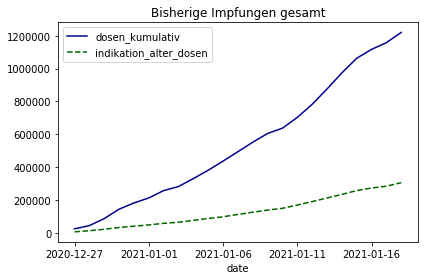

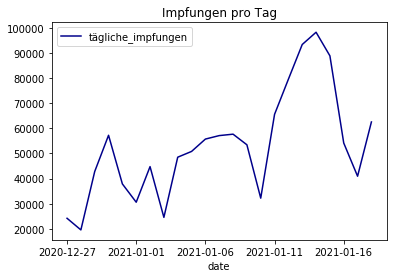

In [57]:
gruppe1 = 8000000 # 80 und älter
gruppe2 = 15630000 # 70 und älter
gruppe3 = 29340000 # 60 und älter
gruppe4 = 58216000 # Herdenimmunität als 70% der Gesamtbevölkerung

%matplotlib inline
ax=data.plot(kind="line", x="date", y="dosen_kumulativ", color="DarkBlue")
ax2=data.plot(kind="line", x="date", y="indikation_alter_dosen", linestyle="dashed", color="DarkGreen",ax=ax)
#ax.set_ylabel("Impfungen kumulativ")
#ax2.set_ylabel("Tägliche Impfungen")
plt.title("Bisherige Impfungen gesamt")
#plt.axhline(y=gruppe1, label="Gruppe 1")
plt.tight_layout()
plt.show()

ax=data.plot(kind="line", x="date", y="tägliche_impfungen", color="DarkBlue")
plt.title("Impfungen pro Tag")
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression

xs = data["tage_seit_impfstart"]
ys = data["dosen_kumulativ"]

xsl = []
for x in xs:
    xsl.append([x])
print(xsl)

model = LinearRegression()
model.fit(xsl,ys)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
predicted = model.predict(xsl)

days_future = list(range(0,200))
fsl = []
for x in days_future:
    fsl.append([x])

future = model.predict(fsl)

### Prognosen über zukünftige Entwicklungen

#### Wichtiger Hinweis: 
Zahlen über Geimpfte werden als Dosen/2 berechnet, was aufgrund der verzögerten Zweitimpfung nicht ganz korrekt ist (für längere Zeithorizonte jedoch recht akkurat sein sollte)

In [60]:
#plt.plot(xs,ys)
#plt.plot(xs,predicted)
#plt.title("Lineare Regression: Impfungen")
#plt.show()

#prognose = []
#value = 0
#for i in future:
#    prognose.append(i/2)
#prognose = [i/2 for i in prognose]
#plt.plot(days_future, prognose)
#plt.title("Lineare Prognose: Geimpfte")
#plt.show()
#prognose_end = round(prognose[-1]/2)
#print("Geimpfte bis Juli 2020: " + str(f"{prognose_end:,d}"))
#prognose_end = round(prognose[-1])
#print("Benötigte Impfdosen bis Juli 2020: " + str(f"{prognose_end:,d}"))

##### Manuelle Prognose

IntText(value=100000, description='Tägl. Impfungen')

Button(description='Simulieren', style=ButtonStyle())

100000


Prognose für 100000 tägliche Impfungen ab heute.


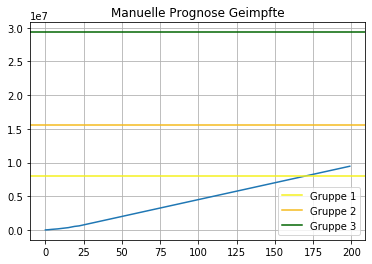

Geimpfte bis Juli 2020: 9,460,142
Benötigte Impfdosen bis Juli 2020: 18,920,284


200000


Prognose für 200000 tägliche Impfungen ab heute.


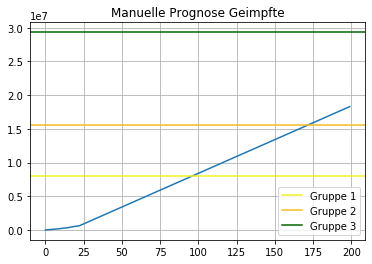

Geimpfte bis Juli 2020: 18,310,142
Benötigte Impfdosen bis Juli 2020: 36,620,284


300000


Prognose für 300000 tägliche Impfungen ab heute.


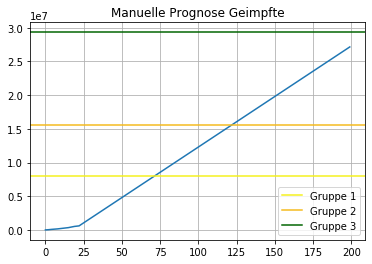

Geimpfte bis Juli 2020: 27,160,142
Benötigte Impfdosen bis Juli 2020: 54,320,284




In [61]:
import ipywidgets as widgets
from IPython.display import display

input = widgets.IntText(description="Tägl. Impfungen", value=100000)
display(input)

def klick(event):
    print(input.value)
    tägliche_impfungen_geschätzt = input.value

    prognose2 = list(data["dosen_kumulativ"])
    days_left = len(days_future) - len(days)
    days_future2 = list(range(0,days_left))
    value = prognose2[-1]
    for i in days_future2:
        value += tägliche_impfungen_geschätzt
        prognose2.append(value)
    prognose2 = [i/2 for i in prognose2]
    print("")
    print("")
    print("Prognose für " + str(input.value) + " tägliche Impfungen ab heute.")
    plt.plot(prognose2)
    plt.grid()
    plt.title("Manuelle Prognose Geimpfte")
    plt.axhline(y=gruppe1, label="Gruppe 1", color="#f5f11d")
    plt.axhline(y=gruppe2, label="Gruppe 2", color="#f5bb1d")
    plt.axhline(y=gruppe3, label="Gruppe 3", color="DarkGreen")
    plt.legend()
    plt.show()
    prognose_end = round(prognose2[-1])
    print("Geimpfte bis Juli 2020: " + str(f"{prognose_end:,d}"))
    prognose_end = round(prognose2[-1]*2)
    print("Benötigte Impfdosen bis Juli 2020: " + str(f"{prognose_end:,d}"))
    print("")
    print("")
    
button = widgets.Button(description="Simulieren")
display(button)
button.on_click(klick)